# Homework 2
## Malvika Viswanathan
## January 29 2024

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

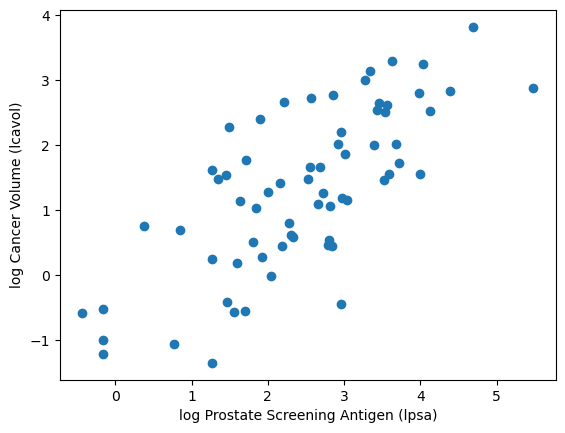

In [2]:
# Load prostate data
prostate = pd.read_csv("prostate.csv")

# Subset to training examples
prostate_train = prostate[prostate['train']]

# Plot lcavol vs lpsa
def plot_psa_data(dat=prostate_train):
    plt.scatter(dat['lpsa'], dat['lcavol'], marker='o')
    plt.xlabel("log Prostate Screening Antigen (lpsa)")
    plt.ylabel("log Cancer Volume (lcavol)")
    
plot_psa_data()
plt.show()

In [3]:
# Regular linear regression
def L2_loss(y, yhat):
    return np.mean((y - yhat) ** 2)


In [4]:
def fit_lin(y, x, loss=L2_loss, beta_init=np.array([-0.51, 0.75])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * x))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

def predict_lin(x, beta):
    return beta[0] + beta[1] * x

## Writing fit_lin and predict_lin functions

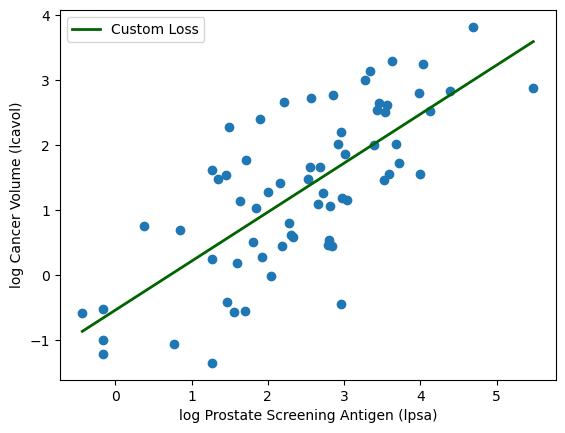

In [5]:
# Fit linear model
lin_beta = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'])

# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred = predict_lin(x_grid, lin_beta)

dat=prostate_train
# Plot data
plot_psa_data()
# Plot predictions
plt.plot(x_grid, lin_pred, color='darkgreen', linewidth=2, label='Custom Loss')
plt.legend()
plt.show()

## Rewriting fit_lin and predict_lin functions as Linear Regression 

C:\Users\malvi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


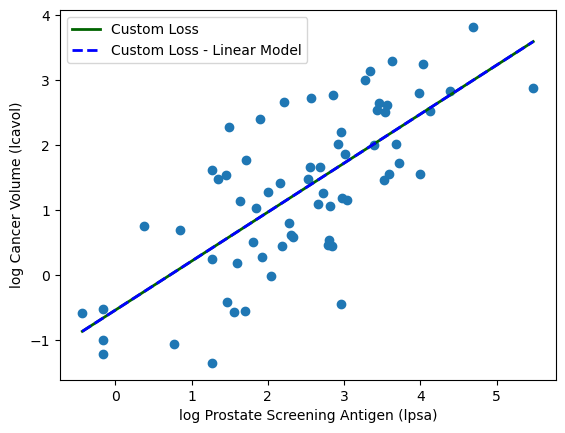

In [6]:
# Rewrite using Linear model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y=prostate_train['lcavol']
x=prostate_train[['lpsa']]
lr.fit(x, y)

x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
pred_lm = lr.predict(x_grid.reshape(-1, 1))

plot_psa_data()
plt.plot(x_grid, lin_pred, color='darkgreen', linewidth=2, label='Custom Loss' )
plt.plot(x_grid, pred_lm, color='blue', linestyle='--', linewidth=2, label='Custom Loss - Linear Model')
plt.legend()
plt.show()

##  1.1 Prediction using L1 Loss

In [7]:
def L1_loss(y, yhat):
    return np.mean(np.abs(y - yhat))

def fit_lin(y, x, loss=L1_loss, beta_init=np.array([-0.51, 0.75])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * x))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

# Example using L1 loss
lin_beta_l1 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=L1_loss)

In [8]:
# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_l1 = predict_lin(x_grid, lin_beta_l1)

## 1.2 Prediction using Tilted Absolute Loss with tau = 0.25, 0.75

In [9]:
def tilted_abs_loss(y, yhat, tau):
    d = y - yhat
    return np.where(d > 0, d * tau, d * (tau - 1))

custom_loss = tilted_abs_loss
## tau = 0.25
def fit_lin(y, x, loss=tilted_abs_loss, beta_init=np.array([-0.51, 0.75]), tau=0.25):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * x, tau))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

lin_beta_tau0p25 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=custom_loss)
# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_tau0p25 = predict_lin(x_grid, lin_beta_tau0p25)

## tau = 0.75
def fit_lin(y, x, loss=tilted_abs_loss, beta_init=np.array([-0.51, 0.75]), tau=0.75):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * x, tau))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init,method='Nelder-Mead')
    beta = result.x

    return beta


lin_beta_tau0p75 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=custom_loss)
# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_tau0p75 = predict_lin(x_grid, lin_beta_tau0p75)

## 2 Plotting the predicted results comparing different losses

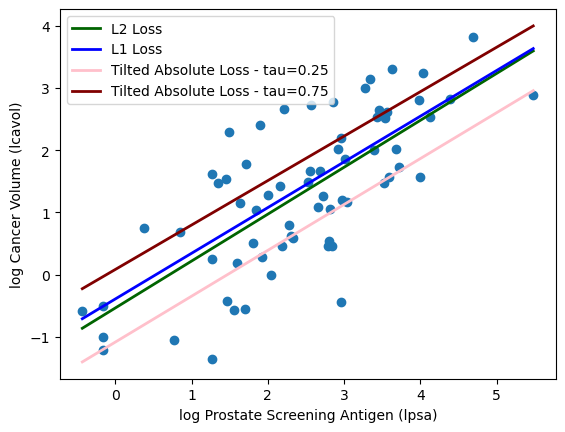

In [10]:
# Plot data
plot_psa_data()
# Plot predictions
plt.plot(x_grid, lin_pred, color='darkgreen', linewidth=2, label='L2 Loss')
plt.plot(x_grid, lin_pred_l1, color='blue', linewidth=2, label='L1 Loss')
plt.plot(x_grid, lin_pred_tau0p25, color='pink', linewidth=2, label='Tilted Absolute Loss - tau=0.25')
plt.plot(x_grid, lin_pred_tau0p75, color='maroon', linewidth=2, label='Tilted Absolute Loss - tau=0.75')
plt.legend()
plt.show()

## 3 Predicting from a non linear model 

In [11]:
# Regular linear regression
# L2 Loss
def L2_loss(y, yhat):
    return np.mean((y - yhat) ** 2)

def fit_lin(y, x, loss=L2_loss, beta_init=np.array([-1, 0,-0.3])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1]*np.exp(-beta[2]*x)))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

def predict_lin(x, beta):
    return beta[0] + beta[1]*np.exp(-beta[2]*x)


# Fit linear model
lin_beta2 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'])

# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred2 = predict_lin(x_grid, lin_beta2)

# L1 Loss
def L1_loss(y, yhat):
    return np.mean(np.abs(y - yhat))

def fit_lin(y, x, loss=L1_loss, beta_init=np.array([-1, 0,-0.3])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1]*np.exp(-beta[2]*x)))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

# Example using L1 loss
lin_beta_l1 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=L1_loss)

# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_l1 = predict_lin(x_grid, lin_beta_l1)

# Tilted Abs Loss - tau = 0.25
def tilted_abs_loss(y, yhat, tau):
    d = y - yhat
    return np.where(d > 0, d * tau, d * (tau - 1))

custom_loss = tilted_abs_loss

def fit_lin(y, x, loss=tilted_abs_loss, beta_init=np.array([-1, 0,-0.3]), tau=0.25):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1]*np.exp(-beta[2]*x), tau))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init, method='Nelder-Mead')
    beta = result.x

    return beta

lin_beta_tau0p25 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=custom_loss)
# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_tau0p25 = predict_lin(x_grid, lin_beta_tau0p25)



# Tilted Abs Loss - tau = 0.75
def fit_lin(y, x, loss=tilted_abs_loss, beta_init=np.array([-1, 0,-0.3]), tau=0.75):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1]*np.exp(-beta[2]*x), tau))

    # Find value of beta that minimizes training error
    result = minimize(err, beta_init,  method='Nelder-Mead')
    beta = result.x

    return beta


lin_beta_tau0p75 = fit_lin(y=prostate_train['lcavol'], x=prostate_train['lpsa'], loss=custom_loss)
# Compute predictions for a grid of inputs
x_grid = np.linspace(min(prostate_train['lpsa']), max(prostate_train['lpsa']), 100)
lin_pred_tau0p75 = predict_lin(x_grid, lin_beta_tau0p75)

## 4 Plotting the predicted results comparing different losses

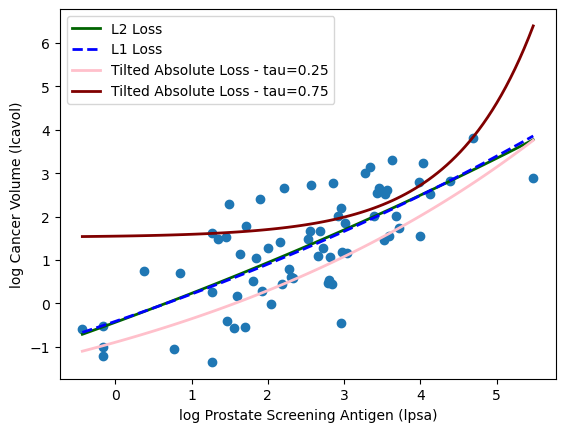

In [12]:
# Plot data
plot_psa_data()
# Plot predictions
plt.plot(x_grid, lin_pred2, color='darkgreen', linewidth=2, label='L2 Loss')
plt.plot(x_grid, lin_pred_l1, color='blue', linewidth=2,linestyle='--',label='L1 Loss')
plt.plot(x_grid, lin_pred_tau0p25, color='pink', linewidth=2, label='Tilted Absolute Loss - tau=0.25')
plt.plot(x_grid, lin_pred_tau0p75, color='maroon', linewidth=2, label='Tilted Absolute Loss - tau=0.75')
plt.legend()
plt.show()

The non linear model provides more flexibility using titled absolute loss in comparison to L1 and L2 losses. Another interesting discovery was that the prediction looks different for different solvers used for minimizing beta. If the solver is set to Nelder-Mead as used in R (default optim), the flexibility increase using all loss functions. However, if beta is minimized used BGFS, the flexibility remains the same using L2 loss and tilted absolute loss with Tau=0.25